# **<center>Recherche Opérationnelle<br /> Projet </center>**

<center> RUDONI Antonin, SIMON Thomas, AMIRBEKYAN Alen, AFANVI Kodjo Roland </center>

# **Introduction**
L'Agence de l'Environnement et de la Maîtrise de l’Énergie (ADEME) a lancé un appel à manifestation d’intérêt pour promouvoir de nouvelles solutions de mobilité durable adaptées à différents territoires. Notre structure, CesiCDP, spécialiste en Mobilité Multimodale Intelligente, répondons à cet appel en s'appuyant nos études antérieures et notre expertise en technologies de transport économiques et écologiques.

Notre objectif est de minimiser les déplacements et la consommation des véhicules lors des livraisons en résolvant un problème algorithmique classique : calculer une tournée optimale sur un réseau routier (VRP) reliant plusieurs villes et revenant au point de départ, tout en minimisant la durée totale. Cette solution est applicable à divers domaines tels que la distribution du courrier, la livraison de produits, et le ramassage des ordures, avec un impact environnemental significatif.

# **Périmètre**

## **Besoins**
Réduire les coûts de transport et les émissions de gaz à effet de serre en optimisant les itinéraires de livraison.

## **Reformulation du problème**
Le problème peut être défini comme suit : étant donné k camions et n villes, 
trouver l'itinéraire optimal pour chaque camion de manière à ce que la distance totale parcourue soit minimisée.

## **Choix de modélisation** 
Pour modéliser ce problème, nous utilisons un graphe non orienté.

### **Représentation Graphique**
- Sommets : Les villes à visiter
- Poids des arêtes : La distance entre deux villes
- Arêtes : Les chemins possibles entre les villes

### **Choix du type de données en entrée**

Les données en entrée incluent :

- La liste des villes à visiter
- Les distances entre chaque paire de villes
- La capacité des camions
- Le nombre de camions disponibles

# **Représentation Graphique** 

Graphe : 
- Sommets -> Villes 
- Poids des arêtes -> Distance entre 2 villes 
- Arêtes -> Chemin entre les villes 



#### **Exemple de représentation par un graphe de ville lié par des routes**
<img src="graphe.png" alt="Description de l'image" style="width:50%;"/>


# **Complexité**

## Definition du problème d'optimisation 
Le problème de la tournée de véhicules (VRP) consiste à trouver le parcours optimal pour k camions afin de visiter n villes, en minimisant la distance totale parcourue tout en respectant les contraintes de capacité des camions et en assurant que chaque ville soit visitée exactement une fois.

## Problème de décision associé 
Existe-t-il une solution pour k camions visitant n villes où la distance totale parcourue ne dépasse pas une valeur donnée ?

## Démonstration VRP par rapport a cycle hamiltonienne
Le VRP est une généralisation de(TSP), qui est un problème classique en théorie de la complexité. TSP demande de trouver le plus court chemin passant par un ensemble de villes et revenant à la ville de départ. Il a été prouvé que le TSP est NP-complet en se basant sur le problème du cycle hamiltonien.

## Réduction du TSP au VRP
Transformation : On peut transformer n'importe quelle instance du TSP en une instance du VRP avec k = 1. Si on peut résoudre VRP, on peut résoudre TSP en définissant un seul camion pour parcourir toutes les villes.
Preuve de NP-complétude du VRP : Puisque le TSP est un cas particulier du VRP, et étant donné que le TSP est NP-complet, il s'ensuit que le VRP est au moins aussi difficile que le TSP. Par conséquent, le VRP est également NP-complet.

## Appartenance à NP 
Pour montrer que le VRP appartient à NP, il suffit de vérifier qu'une solution donnée peut être vérifiée en temps polynomial.
On peut en temps polynomial vérifier :

Que chaque ville est visitée exactement une fois.
Que chaque tournée respecte les contraintes de capacité.
Que la distance totale parcourue est calculée correctement et ne dépasse pas une valeur donnée.
Ainsi, le VRP appartient à NP, et étant donné que le VRP est au moins aussi difficile que le TSP, nous concluons que le VRP est NP-difficile.


## Pire des cas
### Complexité asymptotique 

Dans le pire des cas, le nombre de solutions potentielles du VRP augmente de manière exponentielle avec le nombre de villes et de camions. 
Pour :

- n villes et k camions, il existe O(k^n) manières de répartir les villes entre les camions
- Chaque répartition, il faut trouver l'itinéraire optimal pour chaque camion, ce qui est un problème de TSP pour chaque sous-ensemble de villes

La complexité asymptotique du VRP est donc exprimée comme exponentielle en fonction du nombre de villes, rendant le problème impraticable pour de grandes instances.


# **Modèle mathématique**

Le VRP peut être formulé mathématiquement de cette manière [1]

<img src="modèle_math.png" alt="Description de l'image" style="width:50%;"/>

- 3.7 chaque ville doit être visité une seule fois 
- 3.6 Chaque camion commence au même point de départ 
- 3.8 / 3.9 assure que le camion entre et sort une seule fois par sommet 
- 3.10 contrainte d'élimination des sous-tours (optionnel)


# **Choix et implémentation d'une heuristique**


247.38779056561043


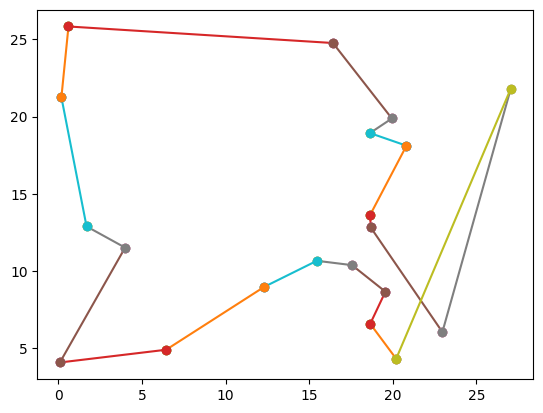

In [6]:
import matplotlib.pyplot as plt
from math import sqrt
from random import random


class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.voision = []

    def arc(self, pointB, plt):
        if self != pointB:
            plt.plot((self.x, pointB.x), (self.y, pointB.y), marker = 'o')

    def sommet(self, plt):
        plt.plot(self.x, self.y,'o')
    
    def distance(self, pointB):
        return sqrt((self.x - pointB.x)**2  + (self.y - pointB.y)**2)

points = []

for i in range(20):
    points.append(Point(x=random()*30, y=random()*30))

def tsp(depart, points, distanceTotal = 0, pointsparc = []):
    pointsparc.append(depart)
    if len(pointsparc) == len(points):
        return (distanceTotal + pointsparc[-2].distance(depart), pointsparc)
    
    min = 1000000000000
    voisin = None
    for p in points:
        if not p in pointsparc:
            distance = depart.distance(p)
            if distance < min:
                min = distance
                voisin = p
    
    return tsp(voisin, points, distanceTotal+distance, pointsparc)

res = tsp(points[0], points)

distance = res[0]

for i in range(len(res[1])-1):
    res[1][i].sommet(plt)
    res[1][i].arc(res[1][i+1], plt)

res[1][0].arc(res[1][-1], plt)

print(distance)

# for p in points:
#     p.sommet(plt)
#     points[5].arc(p, plt)

plt.show()

# **Références**
1 : Malapert, A. (2006). Optimisation de tournées de véhicules pour l’exploitation de Réseau Telecom. Rapp. Stage Diplôme Master Intell. Artif. Décision Univ. Paris, 6.

2 : Bederina, H. (2018). Problèmes de tournées de véhicules robustes multi-objectifs (Doctoral dissertation, Université de Picardie Jules Verne).

3 : http://polymorphe.free.fr/cours/ia/tsp/these_chap_4(TSP).pdf 

4 : https://www.lri.fr/~jcohen/documents/enseignement/VoyageurDeCommerce.pdf